In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df=pd.read_csv('train.csv')

In [4]:
test_df=pd.read_csv('test.csv')

In [5]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
train_df['length']=train_df['text'].apply(len)

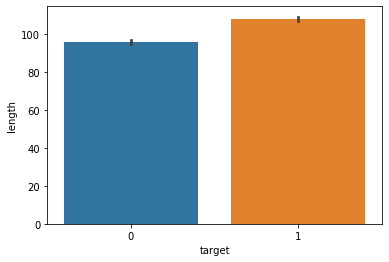

In [7]:
sns.barplot(data=train_df,x='target',y='length')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020053F73C48>,
      dtype=object)

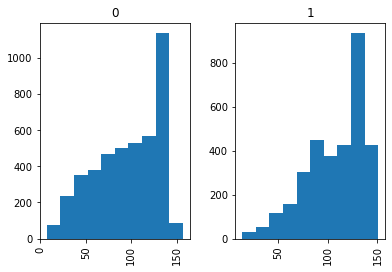

In [8]:
train_df.hist(column='length',by='target')

In [9]:
import string 
import nltk
from nltk.corpus import stopwords


In [10]:
def text_process(tweet):
    
    nopunc = [char for char in tweet if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
train_df.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer

In [13]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(train_df['text'])

bow_transformer_test=CountVectorizer(analyzer=text_process).fit(test_df['text'])

In [14]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x00000200557E2438>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
tweet_bow=bow_transformer.transform(train_df['text'])

tweet_bow_test=bow_transformer.transform(test_df['text'])

In [16]:
tweet_bow_test

<3263x26473 sparse matrix of type '<class 'numpy.int64'>'
	with 24274 stored elements in Compressed Sparse Row format>

In [17]:
tweet_bow

<7613x26473 sparse matrix of type '<class 'numpy.int64'>'
	with 75006 stored elements in Compressed Sparse Row format>

In [18]:
tweet_tfidf=TfidfTransformer(use_idf=False).fit_transform(tweet_bow)
tweet_trans=TfidfTransformer(use_idf=False).transform(tweet_tfidf)


tweet_tfidf_test=TfidfTransformer(use_idf=False).fit_transform(tweet_bow_test)
tweet_trans_test=TfidfTransformer(use_idf=False).transform(tweet_tfidf_test)

In [19]:
tweet_tfidf

<7613x26473 sparse matrix of type '<class 'numpy.float64'>'
	with 75006 stored elements in Compressed Sparse Row format>

In [20]:
tweet_tfidf

<7613x26473 sparse matrix of type '<class 'numpy.float64'>'
	with 75006 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

tweet_mnb=MultinomialNB.fit(tweet_tfidf,train_df['text'])

In [22]:
tweet_model=LogisticRegression().fit(tweet_tfidf,train_df['target'])



In [23]:
tweet_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
tweet_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
train_df['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [27]:
pred=tweet_model.predict(tweet_tfidf_test)

In [28]:
print(pred)

[1 1 1 ... 1 1 0]
